# Imports and Helper Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sympy.solvers import solve
from sympy import Symbol

In [2]:
# input is matrix and index
# output is the column
def col(data, index):
    return [row[index] for row in data]

In [3]:
# input a matrix of a system of equations to generate a plane
def genplane(U):
    # find the eigenvalues and eigenvector
    e_vals, e_vecs = np.linalg.eig(np.dot(U.T, U))  
    # extract the eigenvector associated with the minimum eigenvalue
    return e_vecs[:, np.argmin(e_vals)] 

In [4]:
# input the coefficients to a plane, x matrix, and y matrix
# output the value for z
# solve equation ax + by + cz + d = 0
# coef = [a, b, c, d]
def getz(coef, x, y):
    total = np.add(np.add(np.multiply(coef[0], x), \
                          np. multiply(coef[1], y)), coef[3])
    return np.divide(total, -coef[2])

# Data Generation and Marking

In [5]:
# gendata takes in an int for the number of points to be generated
# it creates an array of arrays where the first value is the bias term,
# next two are the points, and the last is the classification term
# the output is the data, slope, and interept
def gendata(numpoints):
    data = []
    for i in range(numpoints):
        data.append([1, np.random.uniform(-1,1), \
                     np.random.uniform(-1,1), 0])
    
    # creates a line for classification of PLA
    point1 = [np.random.uniform(-1,1), np.random.uniform(-1,1)]
    point2 = [np.random.uniform(-1,1), np.random.uniform(-1,1)]
    slope = (point2[1] - point1[1])/(point2[0] - point1[0])
    intercept = point1[1] - slope * point1[0]
    
    # update the last term of the data
    for j in data:
        if j[2]  < j[1] * slope + intercept:
            j[3] = -1
        else:
            j[3] = 1
            
    return data, slope, intercept

In [6]:
# gendata3D takes in an int for the number of points to be generated
# it creates an array of arrays where the first value is the bias term,
# next three are the points, and the last is the classification term
# the output is the data and plane
def gendata3D(numpoints):
    data = []
    for i in range(numpoints):
        data.append([1, np.random.uniform(-1,1), \
                     np.random.uniform(-1,1), \
                     np.random.uniform(-1,1), 0])
    
    # creates a plane for classification of PLA
    p1 = [np.random.uniform(-1,1), np.random.uniform(-1,1), np.random.uniform(-1,1), 1]
    p2 = [np.random.uniform(-1,1), np.random.uniform(-1,1), np.random.uniform(-1,1), 1]
    p3 = [np.random.uniform(-1,1), np.random.uniform(-1,1), np.random.uniform(-1,1), 1]
    plane = genplane(np.array([p1, p2, p3]))
    
    # update the last term of the data
    for j in data:
        if np.dot(plane[0:3], j[1:4]) + plane[3] < 0:
            j[4] = -1
        else:
            j[4] = 1
            
    return data, plane

# Perceptron Learning Algorithm

In [7]:
# PLA takes in a matrix of data taking the form of the data above
# It runs the standard PLA algorithm and outputs the weights
def PLA(data):
    # set the weights to zero and mark all points as misclassified
    weights = [0, 0, 0]
    misclass = data
    iterations = 0
    
    while len(misclass) != 0:
        # take random index and update weights
        rint = np.random.randint(0, len(misclass))
        weights = np.add(weights, np.multiply(misclass[rint][0:3], misclass[rint][3]))
        iterations += 1
        
        # identify new misclassified data
        misclass = []
        for z in range(len(data)):
            # add if classification value is not the same as weights dot points
            if np.sign(np.dot(weights, data[z][0:3])) != data[z][3]:
                misclass.append(data[z])
                
    return weights

# Running Algorithm and Visualization

2D PLA

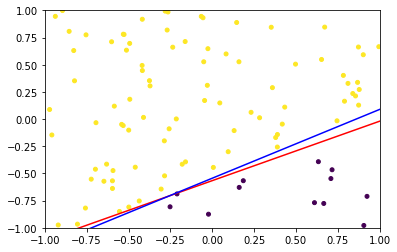

In [11]:
# generate data
data, slope, intercept = gendata(100)
# run PLA
weights = PLA(data)

# new model
slope2 = -(weights[0] / weights[2]) / (weights[0] / weights[1])  
intercept2 = -weights[0] / weights[2]

# create graph of output
# compare the trained model (blue) to actual (red)
plt.plot([-1, 1], [-1 * slope + intercept, 1 * slope + intercept], c='r')
plt.plot([-1, 1], [-1 * slope2 + intercept2, 1 * slope2 + intercept2], c ='b')

# plot data by classification
plt.scatter(col(data, 1), col(data, 2), c=col(data, 3), s= 5 * np.pi)
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

3D PLA

In [12]:
# PLA takes in a matrix of data taking the form of the data above
# It runs the standard PLA algorithm and outputs the weights
# This version takes in a 3D dataset
def PLA3D(data):
    # set the weights to zero and mark all points as misclassified
    weights = [0, 0, 0, 0]
    misclass = data
    
    while len(misclass) != 0:
        # take random index and update weights
        rint = np.random.randint(0, len(misclass))
        weights = np.add(weights, np.multiply(misclass[rint][0:4], misclass[rint][4]))
        
        # identify new misclassified data
        misclass = []
        for z in range(len(data)):
            # add if classification value is not the same as weights dot points
            if np.sign(np.dot(weights, data[z][0:4])) != data[z][4]:
                misclass.append(data[z])
                
    return weights

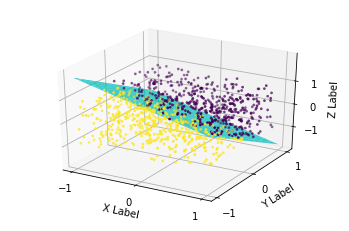

In [15]:
# generate data and plane
data3d, plane = gendata3D(1000)

# create 3D plot
fig = plt.figure()
ax = plt.axes(projection='3d')

# make scatter plot
ax.scatter(col(data3d, 1), col(data3d, 2), col(data3d, 3), \
           c=col(data3d, 4), s = np.pi)

# create plane of model plane
space = np.linspace(-1, 1, 100)
x, y = np.meshgrid(space, space)
z = getz(plane, x, y)
# plane is cyan (red, green, blue)
ax.plot_surface(x, y, z, color=(0,1,1));

# create plane of PLA by creating plane coefficients
weights2 = PLA3D(data3d)

# need to find a way to convert weights of 3D PLA to plane coefficients
#plane2 = []


#z2 = getz(plane2, x, y)
# plane is blue (red, green, blue)
#ax.plot_surface(x, y, z2, color=(0,0,1));

# label and show
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_xticks([-1, 0, 1])
ax.set_yticks([-1, 0, 1])
ax.set_zticks([-1, 0, 1])
ax.dist = 11
plt.show()

Overall, our models fit very well. Visualization is very easy in the 2D version, but there are strong limitations in the 3D version.